In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from utils.load_dataset import load_eval_columns
from dataset_config import HopperConfig, MimicConfig, MinicConfig


In [ ]:
hopper_config = HopperConfig()
tud_config = MinicConfig()
mimic_config = MimicConfig()

In [3]:
tud_full_data = pd.read_csv("datasets/tud_state_vector_v3.csv", usecols=["BEa", "pHa"])
tud_2_full_data = pd.read_csv("datasets/tud_state_vector_v4.csv", usecols=["PaO2", "PaCO2"])

tud_miss_data = pd.read_csv("datasets/tud_3_w_missing_values_random.csv", usecols=["BEa", "pHa"])
tud_2_miss_data = pd.read_csv("datasets/tud_4_w_missing_values_random.csv", usecols=["PaO2", "PaCO2"])

tud_knn_13_data = pd.read_csv("datasets/tud_3_imputed_knn_15.csv", usecols=["BEa", "pHa"])
tud_mice_data = pd.read_csv("datasets/tud_3_imputed_mice.csv", usecols=["BEa", "pHa"])
tud_mf_data = pd.read_csv("datasets/tud_3_imputed_miceforest.csv", usecols=["BEa", "pHa"])
tud_nn_data = pd.read_csv("datasets/tud_3_imputed_nn.csv", usecols=["BEa", "pHa"])
tud_ssl_data = pd.read_csv("datasets/tud_3_imputed_ssl.csv", usecols=["BEa", "pHa"])

tud_2_knn_13_data = pd.read_csv("datasets/tud_4_imputed_knn_15.csv", usecols=["PaO2", "PaCO2"])
tud_2_mice_data = pd.read_csv("datasets/tud_4_imputed_mice.csv", usecols=["PaO2", "PaCO2"])
tud_2_mf_data = pd.read_csv("datasets/tud_4_imputed_miceforest.csv", usecols=["PaO2", "PaCO2"])
tud_2_nn_data = pd.read_csv("datasets/tud_4_imputed_nn.csv", usecols=["PaO2", "PaCO2"])
tud_2_ssl_data = pd.read_csv("datasets/tud_4_imputed_ssl.csv", usecols=["PaO2", "PaCO2"])


In [4]:
mimiciv_full_data = pd.read_csv("datasets\\mimiciv_full_data.csv", usecols=["blood_paco2", "blood_pao2"])
mimiciv_2_full_data = pd.read_csv("datasets/mimiciv_state_vectors_v3.csv", usecols=["blood_be", "vital_map", "vent_pinsp"])

mimiciv_miss_data = pd.read_csv("datasets/mimiciv_w_missing_values_random.csv", usecols=["blood_paco2", "blood_pao2"])
mimiciv_2_miss_data = pd.read_csv("datasets/mimiciv_3_w_missing_values_random.csv", usecols=["blood_be", "vital_map", "vent_pinsp"])

mimiciv_knn_13_data = pd.read_csv("datasets/mimiciv_imputed_knn_15.csv", usecols=["blood_paco2", "blood_pao2"])
mimiciv_mice_data = pd.read_csv("datasets/mimiciv_imputed_mice.csv", usecols=["blood_paco2", "blood_pao2"])
mimiciv_mf_data = pd.read_csv("datasets/mimiciv_imputed_miceforest.csv", usecols=["blood_paco2", "blood_pao2"])
mimiciv_nn_data = pd.read_csv("datasets/mimiciv_imputed_nn.csv", usecols=["blood_paco2", "blood_pao2"])
mimiciv_ssl_data = pd.read_csv("datasets/mimiciv_imputed_ssl.csv", usecols=["blood_paco2", "blood_pao2"])

mimiciv_2_knn_13_data = pd.read_csv("datasets/mimiciv_3_imputed_knn_15.csv", usecols=["blood_be", "vital_map", "vent_pinsp"])
mimiciv_2_mice_data = pd.read_csv("datasets/mimiciv_3_imputed_mice.csv", usecols=["blood_be", "vital_map", "vent_pinsp"])
mimiciv_2_mf_data = pd.read_csv("datasets/mimiciv_3_imputed_miceforest.csv", usecols=["blood_be", "vital_map", "vent_pinsp"])
mimiciv_2_nn_data = pd.read_csv("datasets/mimiciv_3_imputed_nn.csv", usecols=["blood_be", "vital_map", "vent_pinsp"])
mimiciv_2_ssl_data = pd.read_csv("datasets/mimiciv_3_imputed_ssl.csv", usecols=["blood_be", "vital_map", "vent_pinsp"])

In [5]:
tud_eval_col_dict ={}
tud_2_eval_col_dict ={}
mimiciv_eval_col_dict ={}
mimiciv_2_eval_col_dict ={}
hop_eval_col_dict = {}

In [7]:
mimic_map = {'stay_id':'stay_id', 'mv_id':'mv_id', 'timepoints':'timepoints', 'age':'age',
        'blood_be':'BE', 'blood_hco3':'HCO3', 'blood_ph':'pH', 'drugs_vaso4h':'Vasopressor', 'vital_map':'MAP', 'vital_mpap':'MPAP', 'vital_DBP':'DBP', 'ecmo_bloodflow':'ecmo_bloodflow', 'ecmo_rpm':'ecmo_rpm', 'ecmo_sweep':'ecmo_sweep', 'ecmo_active':'ecmo_active',
        'vital_SBP':'SBP', 'vital_SVRI': 'SVR', 'blood_INR': 'INR', 'blood_PTT': 'PTT', 'daemo_sex':'Sex',
        'daemo_weight':'Weight', 'daemo_height':'Height', 'daemo_discharge':'Discharge', 'blood_calcium':'Calcium', 'blood_chlorid':'Chloride', 'blood_caion':'Ionized Calcium', 'blood_magnes':'Magnesium', 'blood_potas':'Potasium', 'blood_sodium':'Sodium', 'vital_cvp':'CVP', 'cum_fluid_balance':'Fluid Balance', 'state_ivfluid4h':'IV Fluid', 'vent_etco2':'EtCO2', 'blood_paco2':'PaCO2', 'blood_pao2':'PaO2', 'vent_fio2':'FiO2', 'vital_spo2':'SpO2', 'blood_sao2':'SaO2', 'blood_svo2':'SvO2', 'blood_sco2':'SCO2', 'blood_smvo2':'SmvO2', 'blood_plat':'Platelets', 'blood_hb':'Hb', 'blood_hct':'Hct', 'blood_wbc':'WBC', 'vital_co':'CO', 'vital_hr':'HR', 'vital_rr':'RR', 'vital_temp':'Temp', 'vital_urine':'Urine', 'state_bun':'BUN', 'blood_crea':'Creatinine', 'state_urin4h':'Urine Output', 'blood_album':'Albumin', 'blood_ast':'AST', 'blood_alt':'ALT', 'blood_billi':'Bilirubin', 'blood_lac':'Lactate', 'blood_gluco':'Glucose', 'state_temp':'Temperature', 'vent_inspexp':'Insp/Exp', 'vent_pinsp':'Pinsp', 'vent_mairpress':'Mairpress', 'vent_mv':'MV', 'vent_peep':'PEEP', 'vent_rsbi':'RSBI', 'vent_rrtot':'RRTot', 'vent_rrcontrolled':'RRControlled', 'vent_rrspont':'RRSpont', 'vent_suppress':'press_sup', 'vent_vt':'VT', 'vent_vtnorm':'VTNorm', 'vent_mode':'Mode', 'state_airtype':'Airtype', 'blood_ffp':'FFP', 'blood_prbc':'PRBC', 'daemo_morta':'Mortality', 'episode_id':'episode_id'
}

tud_map = {
        'caseid':'caseid', 'min duration':'min duration', 'max duration':'max duration', 'BM':'BM', 'FiO2':'FiO2', 'Hilfsdruck':'Hilfsdruck',
       'IE':'IE', 'MV':'MV', 'PEEP':'PEEP', 'Pinsp':'Pinsp', 'RR':'RR', 'VT':'VT', 'etCO2':'EtCO2', 'Abnahme':'Abnahme', 'BEa':'BE',
       'HaCO3':'HCO3', 'Hba':'Hb', 'Lactat':'Lactat', 'PaCO2':'PaCO2', 'PaO2':'PaO2', 'PaO2/FiO2':'FiO2', 'SaO2':'SaO2', 'pHa':'pH',
       'ART':'ART', 'HR':'HR', 'SpO2':'SpO2', 'BG':'BG', 'cont_vent':'cont_vent', 'invasive':'invasive', 'purespont':'purespont', 'Temp':'Temp',
       'Totraum':'Totraum', 'CVP':'CVP', 'Hbv':'Hbv', 'CO':'CO', 'BEv':'BEv', 'HvCO3':'HvCO3', 'PvCO2':'PvCO2', 'PvO2':'PvO2', 'SvO2':'SvO2',
       'pHv':'pHv', 'SV':'SV', 'SVR':'SVR', 'PAP':'PAP', 'PWP':'PWP', 'PVR':'PVR', 'AMV_spont':'AMV_spont', 'Compliance':'Compliance',
       'Resistance':'Resistance', 'Pmean':'Pmean', 'BEmv':'BEmv', 'Hbmv':'Hbmv', 'HmvCO3':'HmvCO3', 'PmvCO2':'PmvCO2', 'PmvO2':'PmvO2',
       'SmvO2':'SmvO2', 'pHmv':'pHmv', 'BEc':'BEc', 'Hbc':'Hbc', 'HcCO3':'HcCO3', 'PcCO2':'PcCO2', 'PcO2':'PcO2', 'ScO2':'ScO2', 'pHc':'pHc',
       'Pplat':'Pplat', 'BE':'BE', 'SO2':'SO2', 'pH':'pH', 'RR_spont':'RR_spont', 'Hb':'Hb', 'SVer':'SVer', 'VO2':'VO2', 'AZV_spont':'AZV_spont'
}

In [7]:
labels = ['Original', 'KNN_15', 'MICE', 'Miceforest', 'GRU', 'SSL']
colors = ['blue', 'red', 'green', 'purple', 'orange', 'magenta']

In [57]:
def plot_hist(data: dict, col):
    fig, ax = plt.subplots(figsize=(17, 10))

    # Get bin edges for consistent bins across all histograms
    bin_edges = np.histogram_bin_edges(data[f"og_{col}"].reset_index(drop=True), bins='auto')
    total_bins = len(bin_edges) - 1

    # Plot histograms with adjusted opacity
    sns.histplot(data=data[f"og_{col}"].reset_index(drop=True), bins=total_bins, ax=ax, kde=True, color='b', alpha=0.5, label='Original')
    sns.histplot(data=data[f"imputed_{col}_knn_13"].reset_index(drop=True), bins=total_bins, ax=ax, kde=True, color='g', alpha=0.5, label='KNN')
    sns.histplot(data=data[f"imputed_{col}_mice"].reset_index(drop=True), bins=total_bins, ax=ax, kde=True, color='r', alpha=0.5, label='MICE')
    sns.histplot(data=data[f"imputed_{col}_mf"].reset_index(drop=True), bins=total_bins, ax=ax, kde=True, color='c', alpha=0.5, label='MissForest')
    sns.histplot(data=data[f"imputed_{col}_nn"].reset_index(drop=True), bins=total_bins, ax=ax, kde=True, color='m', alpha=0.5, label='Neural Network')
    sns.histplot(data=data[f"imputed_{col}_ssl"].reset_index(drop=True), bins=total_bins, ax=ax, kde=True, color='y', alpha=0.5, label='Self-Supervised Learning')

    # Plot mean lines with corresponding text annotations
    methods = {
        "Original": data[f"og_{col}"],
        "KNN": data[f"imputed_{col}_knn_13"],
        "MICE": data[f"imputed_{col}_mice"],
        "MissForest": data[f"imputed_{col}_mf"],
        "Neural Network": data[f"imputed_{col}_nn"],
        "Self-Supervised Learning": data[f"imputed_{col}_ssl"]
    }

    for i, (method, series) in enumerate(methods.items()):
        mean_value = series.mean()
        ax.axvline(mean_value, color='k', linestyle='dashed', linewidth=2)
        ax.text(mean_value + 0.2, ax.get_ylim()[1] * (0.9 - i * 0.05), f'{method} Mean: {mean_value:.2f}', color='k', fontsize=16, weight='bold')

    # Customize plot
    ax.set_title(f'Histogram Comparison of {col}', fontsize=20)
    ax.set_xlabel(col, fontsize=16)
    ax.set_ylabel('Frequency', fontsize=16)
    ax.legend()

    # Save and close plot
    plt.savefig(f"visualizations/histogram/{col}_histogram_comparison.png", bbox_inches='tight')
    plt.close()

def plot_kde(data: dict, col, dataset_name):
    fig, ax = plt.subplots(figsize=(17, 10), dpi=500)
    ax.grid(False)

    # Plot KDEs for each dataset
    sns.kdeplot(data[f"og_{col}"], ax=ax, color='b', linewidth=2.5, label='Original')
    sns.kdeplot(data[f"imputed_{col}_knn_13"], ax=ax, color='g', linewidth=2.5, label='KNN')
    sns.kdeplot(data[f"imputed_{col}_mice"], ax=ax, color='r', linewidth=2.5, label='MICE')
    sns.kdeplot(data[f"imputed_{col}_mf"], ax=ax, color='c', linewidth=2.5, label='MiceForest')
    sns.kdeplot(data[f"imputed_{col}_nn"], ax=ax, color='m', linewidth=2.5, label='GRU')
    sns.kdeplot(data[f"imputed_{col}_ssl"], ax=ax, color='y', linewidth=2.5, label='Self-Supervised Learning')

    # Plot mean lines with corresponding text annotations
    methods = {
        "Original": data[f"og_{col}"],
        "KNN": data[f"imputed_{col}_knn_13"],
        "MICE": data[f"imputed_{col}_mice"],
        "MiceForest": data[f"imputed_{col}_mf"],
        "GRU": data[f"imputed_{col}_nn"],
        "Self-Supervised Learning": data[f"imputed_{col}_ssl"]
    }

    x_min, x_max = ax.get_xlim()  # Get current x-axis limits
    x_range = x_max - x_min       # Calculate the range of x-axis

    for i, (method, series) in enumerate(methods.items()):
        mean_value = series.mean()
        ax.axvline(mean_value, color='k', linestyle='dashed', linewidth=2)
        
        # Adjust annotation dynamically based on x-axis range
        x_offset = x_range * 0.02  # Offset is 2% of the x-axis range
        ax.text(mean_value + x_offset, ax.get_ylim()[1] * (0.9 - i * 0.05), 
                f'{method} Mean: {mean_value:.2f}', color='k', fontsize=24, weight='bold')

    # Add borders to the center box
    for spine in ax.spines.values():
        spine.set_edgecolor("black")  # Set border color
        spine.set_linewidth(2) 
    
    if col in mimic_map.keys():
        col = mimic_map[col]
    
    ax.tick_params(axis='both', which='major', labelsize=20, width=2, labelcolor='black')
        
    # Customize plot
    ax.set_title(f'{dataset_name}', fontsize=34, fontweight='bold')
    ax.set_xlabel(f'{col} - Measurements', fontsize=34, fontweight='bold')
    ax.set_ylabel('Density', fontsize=34, fontweight='bold')
    ax.tick_params(axis='x', labelsize=28) 
    ax.tick_params(axis='y', labelsize=28) 
    ax.legend(fontsize=24)
    sns.move_legend(ax, "lower right", fontsize=24)

    sns.despine()

    # Save and close plot
    plt.tight_layout()
    plt.savefig(f"visualizations/kde_new/{dataset_name}_{col}.png", bbox_inches='tight')
    plt.close()

In [22]:
hop_full_data = pd.read_csv("datasets/Hopper-v4.csv", usecols=["obs_6", "obs_7"])
hop_miss_data = pd.read_csv("datasets/Hopper-v4_w_missing_values_random.csv", usecols=["obs_6", "obs_7"])

hop_knn_13_data = pd.read_csv("datasets/Hopper-v4_w_imputed_knn_random_13.csv", usecols=["obs_6", "obs_7"])
hop_mice_data = pd.read_csv("datasets/Hopper-v4_w_imputed_mice_random.csv", usecols=["obs_6", "obs_7"])
hop_mf_data = pd.read_csv("datasets/Hopper-v4_w_imputed_mf_random.csv", usecols=["obs_6", "obs_7"])
hop_nn_data = pd.read_csv("datasets/hopper_imputed_nn.csv", usecols=["obs_6", "obs_7"])
hop_ssl_data = pd.read_csv("datasets/hopper_imputed_ssl.csv", usecols=["obs_6", "obs_7"])

for col in ["obs_6", "obs_7"]:
    hop_miss_col_row = hop_miss_data.loc[:, col].isna()

    hop_og_col = hop_full_data[hop_miss_col_row].loc[:, col]
    hop_imputed_col_knn_13 = hop_knn_13_data[hop_miss_col_row].loc[:, col]
    hop_imputed_col_mice = hop_mice_data[hop_miss_col_row].loc[:, col]
    hop_imputed_col_mf = hop_mf_data[hop_miss_col_row].loc[:, col]
    hop_imputed_col_nn = hop_nn_data[hop_miss_col_row].loc[:, col]
    hop_imputed_col_ssl = hop_ssl_data[hop_miss_col_row].loc[:, col]
    
    hop_eval_col_dict[f"og_{col}"] = hop_og_col
    hop_eval_col_dict[f"imputed_{col}_knn_13"] = hop_imputed_col_knn_13
    hop_eval_col_dict[f"imputed_{col}_mice"] = hop_imputed_col_mice
    hop_eval_col_dict[f"imputed_{col}_mf"] = hop_imputed_col_mf
    hop_eval_col_dict[f"imputed_{col}_nn"] = hop_imputed_col_nn
    hop_eval_col_dict[f"imputed_{col}_ssl"] = hop_imputed_col_ssl
    #new_scatter_plot(tud_eval_col_dict, col)
    #plot_hist(hop_eval_col_dict, col)
    plot_kde(hop_eval_col_dict, col)

# TUD Plotting

In [58]:
for col in ["BEa", "pHa"]:
    tud_miss_col_row = tud_miss_data.loc[:, col].isna()

    tud_og_col = tud_full_data[tud_miss_col_row].loc[:, col]
    tud_imputed_col_knn_13 = tud_knn_13_data[tud_miss_col_row].loc[:, col]
    tud_imputed_col_mice = tud_mice_data[tud_miss_col_row].loc[:, col]
    tud_imputed_col_mf = tud_mf_data[tud_miss_col_row].loc[:, col]
    tud_imputed_col_nn = tud_nn_data[tud_miss_col_row].loc[:, col]
    tud_imputed_col_ssl = tud_ssl_data[tud_miss_col_row].loc[:, col]

    tud_eval_col_dict[f"og_{col}"] = tud_og_col
    tud_eval_col_dict[f"imputed_{col}_knn_13"] = tud_imputed_col_knn_13
    tud_eval_col_dict[f"imputed_{col}_mice"] = tud_imputed_col_mice
    tud_eval_col_dict[f"imputed_{col}_mf"] = tud_imputed_col_mf
    tud_eval_col_dict[f"imputed_{col}_nn"] = tud_imputed_col_nn
    tud_eval_col_dict[f"imputed_{col}_ssl"] = tud_imputed_col_ssl
    #new_scatter_plot(tud_eval_col_dict, col)
    #plot_hist(tud_eval_col_dict, col)
    if col in tud_map.keys():
        col = tud_map[col]
        plot_kde(tud_eval_col_dict, col, "MINIC Set 1")

for col in ["PaO2", "PaCO2"]:
    tud_2_miss_col_row = tud_2_miss_data.loc[:, col].isna()

    tud_2_og_col = tud_2_full_data[tud_2_miss_col_row].loc[:, col]
    tud_2_imputed_col_knn_13 = tud_2_knn_13_data[tud_2_miss_col_row].loc[:, col]
    tud_2_imputed_col_mice = tud_2_mice_data[tud_2_miss_col_row].loc[:, col]
    tud_2_imputed_col_mf = tud_2_mf_data[tud_2_miss_col_row].loc[:, col]
    tud_2_imputed_col_nn = tud_2_nn_data[tud_2_miss_col_row].loc[:, col]
    tud_2_imputed_col_ssl = tud_2_ssl_data[tud_2_miss_col_row].loc[:, col]

    tud_2_eval_col_dict[f"og_{col}"] = tud_2_og_col
    tud_2_eval_col_dict[f"imputed_{col}_knn_13"] = tud_2_imputed_col_knn_13
    tud_2_eval_col_dict[f"imputed_{col}_mice"] = tud_2_imputed_col_mice
    tud_2_eval_col_dict[f"imputed_{col}_mf"] = tud_2_imputed_col_mf
    tud_2_eval_col_dict[f"imputed_{col}_nn"] = tud_2_imputed_col_nn
    tud_2_eval_col_dict[f"imputed_{col}_ssl"] = tud_2_imputed_col_ssl
    #new_scatter_plot(tud_2_eval_col_dict, col)
    #plot_hist(tud_2_eval_col_dict, col)

    if col in tud_map.keys():
        col = tud_map[col]
        plot_kde(tud_2_eval_col_dict, col, "MINIC Set 2")

# MIMIC IV Plotting

In [59]:
for col in ["blood_paco2", "blood_pao2"]:
    mimiciv_miss_col_row = mimiciv_miss_data.loc[:, col].isna()

    mimiciv_og_col = mimiciv_full_data[mimiciv_miss_col_row].loc[:, col]
    mimiciv_imputed_col_knn_13 = mimiciv_knn_13_data[mimiciv_miss_col_row].loc[:, col]
    mimiciv_imputed_col_mice = mimiciv_mice_data[mimiciv_miss_col_row].loc[:, col]
    mimiciv_imputed_col_mf = mimiciv_mf_data[mimiciv_miss_col_row].loc[:, col]
    mimiciv_imputed_col_nn = mimiciv_nn_data[mimiciv_miss_col_row].loc[:, col]
    mimiciv_imputed_col_ssl = mimiciv_ssl_data[mimiciv_miss_col_row].loc[:, col]

    mimiciv_eval_col_dict[f"og_{col}"] = mimiciv_og_col
    mimiciv_eval_col_dict[f"imputed_{col}_knn_13"] = mimiciv_imputed_col_knn_13
    mimiciv_eval_col_dict[f"imputed_{col}_mice"] = mimiciv_imputed_col_mice
    mimiciv_eval_col_dict[f"imputed_{col}_mf"] = mimiciv_imputed_col_mf
    mimiciv_eval_col_dict[f"imputed_{col}_nn"] = mimiciv_imputed_col_nn
    mimiciv_eval_col_dict[f"imputed_{col}_ssl"] = mimiciv_imputed_col_ssl
    #new_scatter_plot(mimiciv_eval_col_dict, col)
    #plot_hist(mimiciv_eval_col_dict, col)
    
    plot_kde(mimiciv_eval_col_dict, col, "MIMIC IV Set 1")

for col in ["blood_be", "vital_map", "vent_pinsp"]:
    mimiciv_2_miss_col_row = mimiciv_2_miss_data.loc[:, col].isna()

    mimiciv_2_og_col = mimiciv_2_full_data[mimiciv_2_miss_col_row].loc[:, col]
    mimiciv_2_imputed_col_knn_13 = mimiciv_2_knn_13_data[mimiciv_2_miss_col_row].loc[:, col]
    mimiciv_2_imputed_col_mice = mimiciv_2_mice_data[mimiciv_2_miss_col_row].loc[:, col]
    mimiciv_2_imputed_col_mf = mimiciv_2_mf_data[mimiciv_2_miss_col_row].loc[:, col]
    mimiciv_2_imputed_col_nn = mimiciv_2_nn_data[mimiciv_2_miss_col_row].loc[:, col]
    mimiciv_2_imputed_col_ssl = mimiciv_2_ssl_data[mimiciv_2_miss_col_row].loc[:, col]

    mimiciv_2_eval_col_dict[f"og_{col}"] = mimiciv_2_og_col
    mimiciv_2_eval_col_dict[f"imputed_{col}_knn_13"] = mimiciv_2_imputed_col_knn_13
    mimiciv_2_eval_col_dict[f"imputed_{col}_mice"] = mimiciv_2_imputed_col_mice
    mimiciv_2_eval_col_dict[f"imputed_{col}_mf"] = mimiciv_2_imputed_col_mf
    mimiciv_2_eval_col_dict[f"imputed_{col}_nn"] = mimiciv_2_imputed_col_nn
    mimiciv_2_eval_col_dict[f"imputed_{col}_ssl"] = mimiciv_2_imputed_col_ssl
    #new_scatter_plot(mimiciv_2_eval_col_dict, col)
    #plot_hist(mimiciv_2_eval_col_dict, col)
    plot_kde(mimiciv_2_eval_col_dict, col, "MIMIC IV Set 2")

In [2]:
imputers = ["knn_13", "mice", "mf", "nn", "ssl"]

In [4]:
eval_cols_dict = load_eval_columns(tud_config, "ssl")
eval_cols_dict.keys()

dict_keys(['og_BEa_1', 'imputed_BEa_1', 'og_pHa_2', 'imputed_pHa_2'])

# Plot Evaluations

In [9]:
evaluations = pd.read_csv("evals/evaluations.csv")

metrics = evaluations.columns[3:-1]
datasets = ["hopper"]             #evaluations['File'].unique()

In [11]:
for dataset in datasets:
    dataset_evals = evaluations[evaluations['File'] == dataset]
    #print(dataset_evals['Feature'].unique())
    features = ["obs_6", "obs_7"]    #dataset_evals['Feature'].unique()

    for feature in features:
        feature_evals = dataset_evals[dataset_evals['Feature'] == feature]
        #print(feature_evals.head())

        for metric in metrics:
            plt.figure(figsize=(7, 5))
            sns.lineplot(data=feature_evals, x='Imputer', y=metric, marker='o', markersize=8, linewidth=2)

            # Get the current axes
            ax = plt.gca()
            y_values = [y for line in ax.lines for y in line.get_ydata()]
            #print(y_values)
            

            '''if 'MSE' in metric and  not 'RMSE' in metric:
                # Iterate over the points in the line
                for line in ax.lines:
                    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
                        ax.text(x_value, y_value + 0.01, f'{y_value:.5f}', ha='center', color=color, fontsize=12, fontweight=weight)
                        
              
            else:
                # Iterate over the points in the line
                for line in ax.lines:
                    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
                        ax.text(x_value, y_value + 0.001, f'{y_value:.3f}', ha='center', color=color, fontsize=12, fontweight=weight)'''
            
            for line in ax.lines:
                for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
                    if 'R2 Score' in metric:
                        color = 'green' if y_value == max(y_values) else 'red' if y_value == min(y_values) else 'black'
                    else:
                        color = 'green' if y_value == min(y_values) else 'red' if y_value == max(y_values) else 'black'

                    weight = 'bold' if y_value in [min(y_values), max(y_values)] else 'normal'

                    if 'MSE' in metric and  not 'RMSE' in metric:
                        ax.text(x_value, y_value + 0.01, f'{y_value: .5f}', ha='center', color=color, fontsize=12, fontweight=weight)
                    else:
                        ax.text(x_value, y_value + 0.001, f'{y_value: .3f}', ha='center', color=color, fontsize=12, fontweight=weight)
 

            plt.xticks(fontsize=12, fontweight='bold')
            plt.yticks(fontsize=12, fontweight='bold')
            

            if '(' in metric:
                metric_name = metric.split('(')[1].replace(')', '')
            else:
                metric_name = metric

            plt.ylabel(metric_name)
            ax.set_ylim([min(line.get_ydata()) - 0.02, max(line.get_ydata()) + 0.04])
            plt.title(f"{metric_name} for {feature} - {dataset.capitalize()} Dataset")

            plt.savefig(f"visualizations/evaluations/{feature}_{metric_name}.png", bbox_inches='tight')
            plt.close()



In [7]:
mimic_miss = pd.read_csv("stats/mimiciv_missing_stats.csv")
mimic_miss['Missing_Percentage'] = round(mimic_miss['Missing_Percentage'], 2)
mimic_miss = mimic_miss.drop(columns=['Missing_Count']).set_index('Column')

mimic_miss.index = mimic_miss.index.map(mimic_map)
mimic_miss.index

Index(['stay_id', 'mv_id', 'timepoints', 'age', 'BE', 'HCO3', 'pH',
       'Vasopressor', 'MAP', 'MPAP', 'DBP', 'SBP', 'SVR', 'INR', 'PTT', 'Sex',
       'Weight', 'Height', 'Discharge', 'ecmo_bloodflow', 'ecmo_rpm',
       'ecmo_sweep', 'ecmo_active', 'Calcium', 'Chloride', 'Ionized Calcium',
       'Magnesium', 'Potasium', 'Sodium', 'CVP', 'Fluid Balance', 'IV Fluid',
       'EtCO2', 'PaCO2', 'PaO2', 'FiO2', 'SpO2', 'SaO2', 'SvO2', 'SCO2',
       'SmvO2', 'Platelets', 'Hb', 'Hct', 'WBC', 'CO', 'HR', 'BUN',
       'Creatinine', 'Urine Output', 'Albumin', 'AST', 'ALT', 'Bilirubin',
       'Lactate', 'Glucose', 'Temperature', 'Insp/Exp', 'Pinsp', 'Mairpress',
       'MV', 'PEEP', 'RSBI', 'RRTot', 'RRControlled', 'RRSpont', 'press_sup',
       'VT', 'VTNorm', 'Mode', 'Airtype', 'FFP', 'PRBC', 'Mortality',
       'episode_id'],
      dtype='object', name='Column')

In [8]:
mimic_miss = mimic_miss[(mimic_miss['Missing_Percentage'] > 0) & (mimic_miss['Missing_Percentage'] < 99)]
len(mimic_miss.index)

53

In [9]:
import matplotlib as mpl
# Define a custom colormap using the extracted colors
custom_colors = ['#6D6E80', '#C8C8C8', '#E9DCC9', '#EBCFBA', '#D7C3C3']
custom_colors.reverse()

custom_cmap = mpl.colors.LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

#cmap = sns.cubehelix_palette(start=0, as_cmap=True)

In [11]:
tud_miss = pd.read_csv("stats/tud_missing_stats.csv")
tud_miss['Missing_Percentage'] = round(tud_miss['Missing_Percentage'], 2)
tud_miss = tud_miss.drop(columns=['Missing_Count']).set_index('Column')
tud_miss

,Missing_Percentage
Column,
caseid,0.00
min duration,0.00
max duration,0.00
BM,84.92
FiO2,84.66
...,...
RR_spont,99.44
Hb,99.99
SVer,99.98


In [12]:
tud_miss.index = tud_miss.index.map(tud_map)
tud_miss.index

Index(['caseid', 'min duration', 'max duration', 'BM', 'FiO2', 'Hilfsdruck',
       'IE', 'MV', 'PEEP', 'Pinsp', 'RR', 'VT', 'EtCO2', 'Abnahme', 'BEa',
       'HCO3', 'Hb', 'Lactat', 'PaCO2', 'PaO2', 'FiO2', 'SaO2', 'pHa', 'ART',
       'HR', 'SpO2', 'BG', 'cont_vent', 'invasive', 'purespont', 'Temp',
       'Totraum', 'CVP', 'Hbv', 'CO', 'BEv', 'HvCO3', 'PvCO2', 'PvO2', 'SvO2',
       'pHv', 'SV', 'SVR', 'PAP', 'PWP', 'PVR', 'AMV_spont', 'Compliance',
       'Resistance', 'Pmean', 'BEmv', 'Hbmv', 'HmvCO3', 'PmvCO2', 'PmvO2',
       'SmvO2', 'pHmv', 'BEc', 'Hbc', 'HcCO3', 'PcCO2', 'PcO2', 'ScO2', 'pHc',
       'Pplat', 'BE', 'SO2', 'pH', 'RR_spont', 'Hb', 'SVer', 'VO2',
       'AZV_spont'],
      dtype='object', name='Column')

In [14]:
tud_miss = tud_miss[(tud_miss['Missing_Percentage'] > 0) & (tud_miss['Missing_Percentage'] < 99)]
len(tud_miss.index)

33

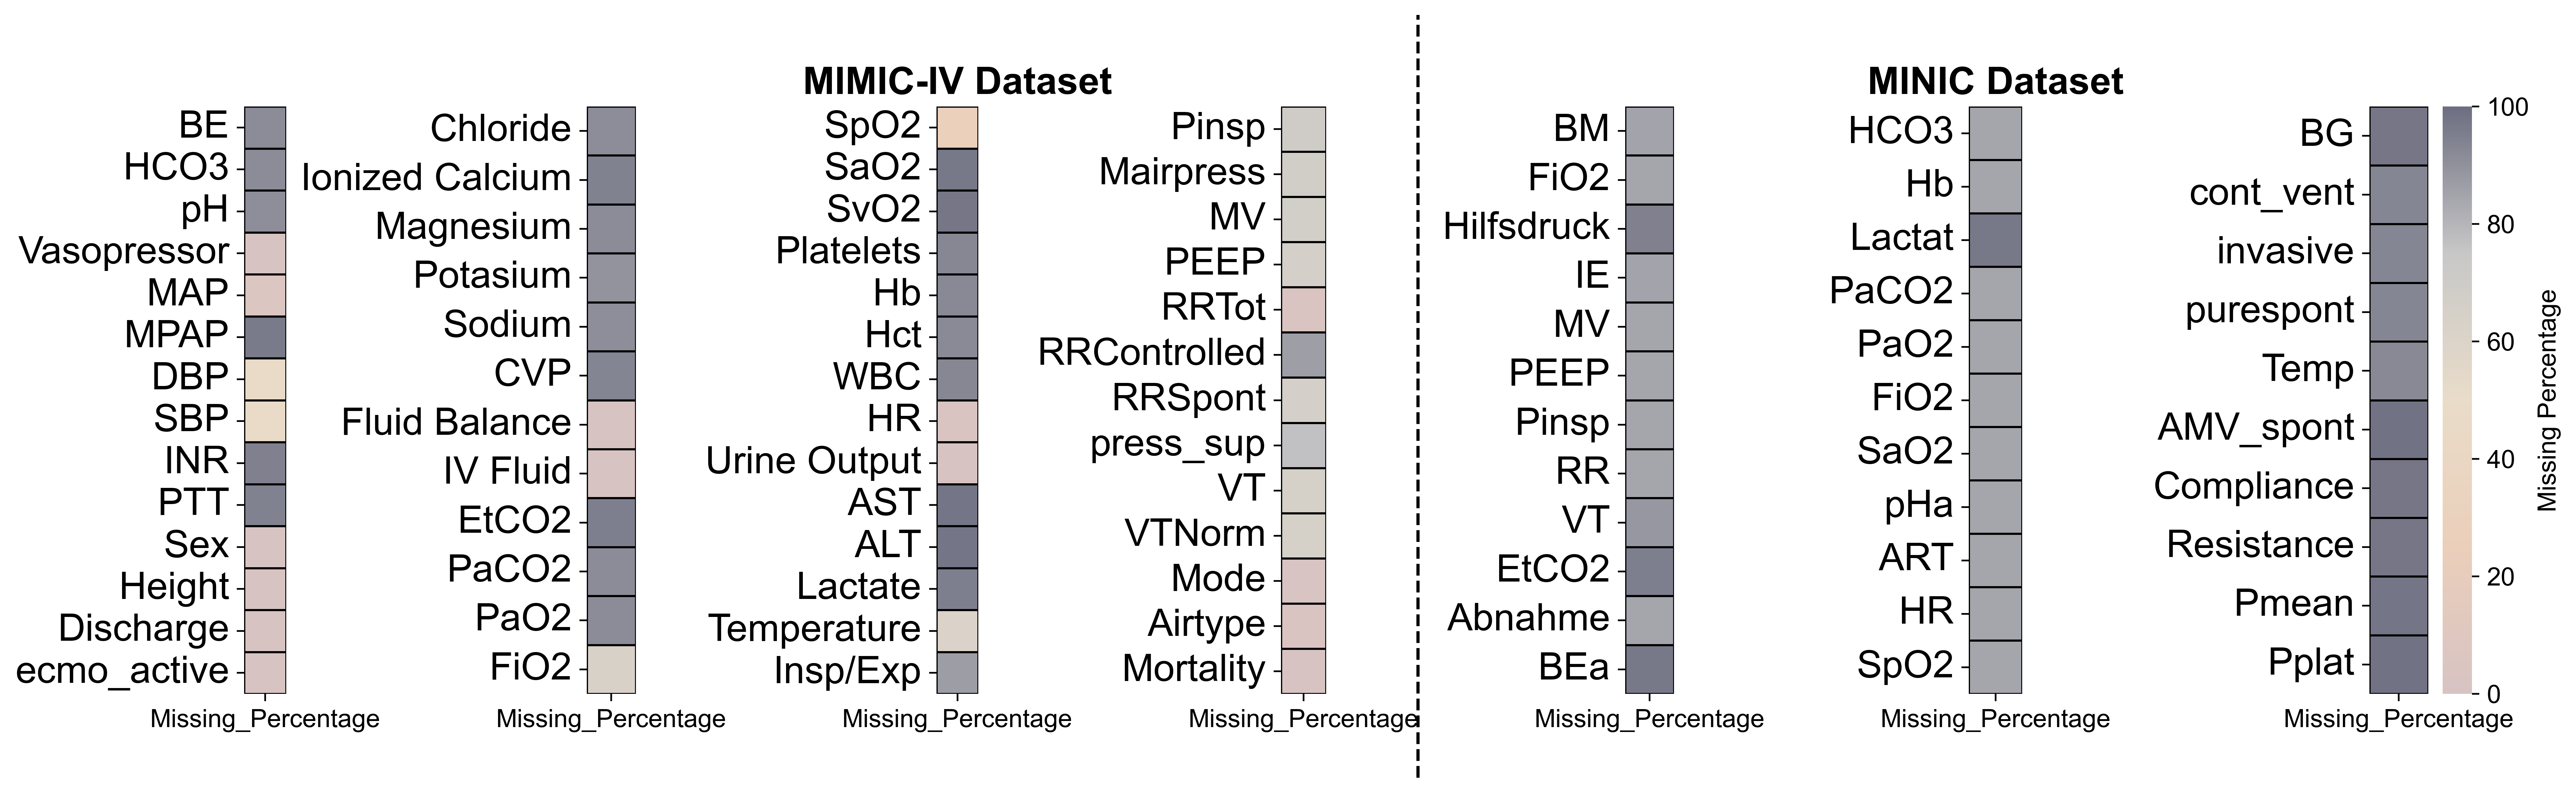

In [36]:
fig, ax = plt.subplots(1, 7, figsize=(20, 5), dpi=500)
heatmap_1 = sns.heatmap(mimic_miss[:14], cmap=custom_cmap, linewidths=1, linecolor='black', yticklabels=mimic_miss[:14].index, square=True, ax=ax[0], cbar=False, vmin=0, vmax=100)
heatmap_2 = sns.heatmap(mimic_miss[14:26], cmap=custom_cmap, linewidths=1, linecolor='black', yticklabels=mimic_miss[14:26].index, square=True, ax=ax[1], cbar=False, vmin=0, vmax=100)
heatmap_3 = sns.heatmap(mimic_miss[26:40], cmap=custom_cmap, linewidths=1, linecolor='black', yticklabels=mimic_miss[26:40].index, square=True, ax=ax[2], cbar=False, vmin=0, vmax=100)
heatmap_4 = sns.heatmap(mimic_miss[40:], cmap=custom_cmap, linewidths=1, linecolor='black', yticklabels=mimic_miss[40:].index, square=True, ax=ax[3], cbar=False, vmin=0, vmax=100)
heatmap_5 = sns.heatmap(tud_miss[:12], cmap=custom_cmap, linewidths=1, linecolor='black', yticklabels=tud_miss[:12].index, square=True, ax=ax[4], cbar=False, vmin=0, vmax=100)
heatmap_6 = sns.heatmap(tud_miss[12:23], cmap=custom_cmap, linewidths=1, linecolor='black', yticklabels=tud_miss[12:23].index, square=True, ax=ax[5], cbar=False, vmin=0, vmax=100)
heatmap_7 = sns.heatmap(tud_miss[23:], cmap=custom_cmap, linewidths=1, linecolor='black', yticklabels=tud_miss[23:].index, square=True, ax=ax[6], vmin=0, vmax=100, cbar_kws={'label': 'Missing Percentage'})

#heatmap_1.set_xlabel(None)
heatmap_1.set_ylabel(None)
#heatmap_2.set_xlabel(None)
heatmap_2.set_ylabel(None)
#heatmap_3.set_xlabel(None)
heatmap_3.set_ylabel(None)
#heatmap_4.set_xlabel(None)
heatmap_4.set_ylabel(None)
#heatmap_5.set_xlabel(None)
heatmap_5.set_ylabel(None)
heatmap_6.set_ylabel(None)
heatmap_7.set_ylabel(None)

plt.rcParams['font.family'] = 'Arial'  # Use a clear, professional font
plt.rcParams['font.size'] = 18  # Increase font size for better readability


# Draw a vertical dashed line between axis 4 and 5
fig.add_artist(plt.Line2D([0.55, 0.55], [0, 1], transform=fig.transFigure, color="black", linestyle="--"))

for a in ax:
    a.tick_params(axis='y', labelsize=18)
    a.set_aspect('equal')

ax[2].set_title("MIMIC-IV Dataset", fontsize=18, fontweight='bold')
ax[5].set_title("MINIC Dataset", fontsize=18, fontweight='bold')
plt.show()

In [13]:
plt.savefig('missing_data_heatmap.jpg', format='jpg', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [15]:
mimic = pd.read_csv("datasets/mimiciv_full_data.csv")
mimic_2 = pd.read_csv("datasets/mimiciv_state_vectors_v3.csv")
tud_3 = pd.read_csv("datasets/tud_state_vector_v3.csv")
tud_4 = pd.read_csv("datasets/tud_state_vector_v4.csv")

In [16]:
mapping = {'vent_etco2':'EtCO2', 'vent_fio2':'FiO2', 'vital_spo2':'SpO2', 'vital_hr':'HR', 'vent_rrtot':'RRtot',
           'blood_paco2':'PaCO2', 'blood_pao2':'PaO2', 'blood_ph':'pH', 'blood_hco3':'HCO3', 'vital_DBP':'DBP',
           'vital_SBP':'SBP','vent_mairpress':'Pmean','vent_peep':'PEEP','vent_suppress':'press_sup','blood_be':'BE', 'vital_map':'MAP', 'vent_pinsp':'Pinsp', 'HaCO3': 'HCO3'}

mimic = mimic.rename(columns=mapping)
mimic_2 = mimic_2.rename(columns=mapping)
tud_3 = tud_3.rename(columns=tud_map)
tud_4 = tud_4.rename(columns=tud_map)

In [17]:
mimic_corr = mimic.corr().drop(['EtCO2', 'FiO2', 'SpO2', 'HR', 'RRtot', 'episode_id'], axis=0).drop(['PaCO2', 'PaO2', 'episode_id'], axis=1)
mimic_2_corr = mimic_2.corr().drop(['HCO3', 'pH', 'DBP','SBP','PaCO2', 'Pmean','PEEP','press_sup'], axis=0).drop(['BE', 'MAP', 'Pinsp'], axis=1)
tud_3_corr = tud_3.corr().drop(['HCO3','Lactat','PaCO2','SaO2','SpO2'], axis=0).drop(['BE', 'pH'], axis=1)
tud_4_corr = tud_4.corr().drop(["BE","HCO3","Lactat","SaO2", "pH", "HR", "SpO2"], axis=0).drop(["PaCO2", "PaO2"], axis=1)


In [18]:
mimic_corr.abs().mean(axis=1), mimic_2_corr.abs().mean(axis=1), tud_3_corr.abs().mean(axis=1), tud_4_corr.abs().mean(axis=1)

(PaCO2    0.187086
 PaO2     0.112247
 dtype: float64,
 BE       0.314070
 MAP      0.229680
 Pinsp    0.269834
 dtype: float64,
 BE    0.368249
 pH    0.389348
 dtype: float64,
 PaCO2    0.301022
 PaO2     0.159436
 dtype: float64)

C:\Users\prath\AppData\Local\Temp\ipykernel_20472\2605791880.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


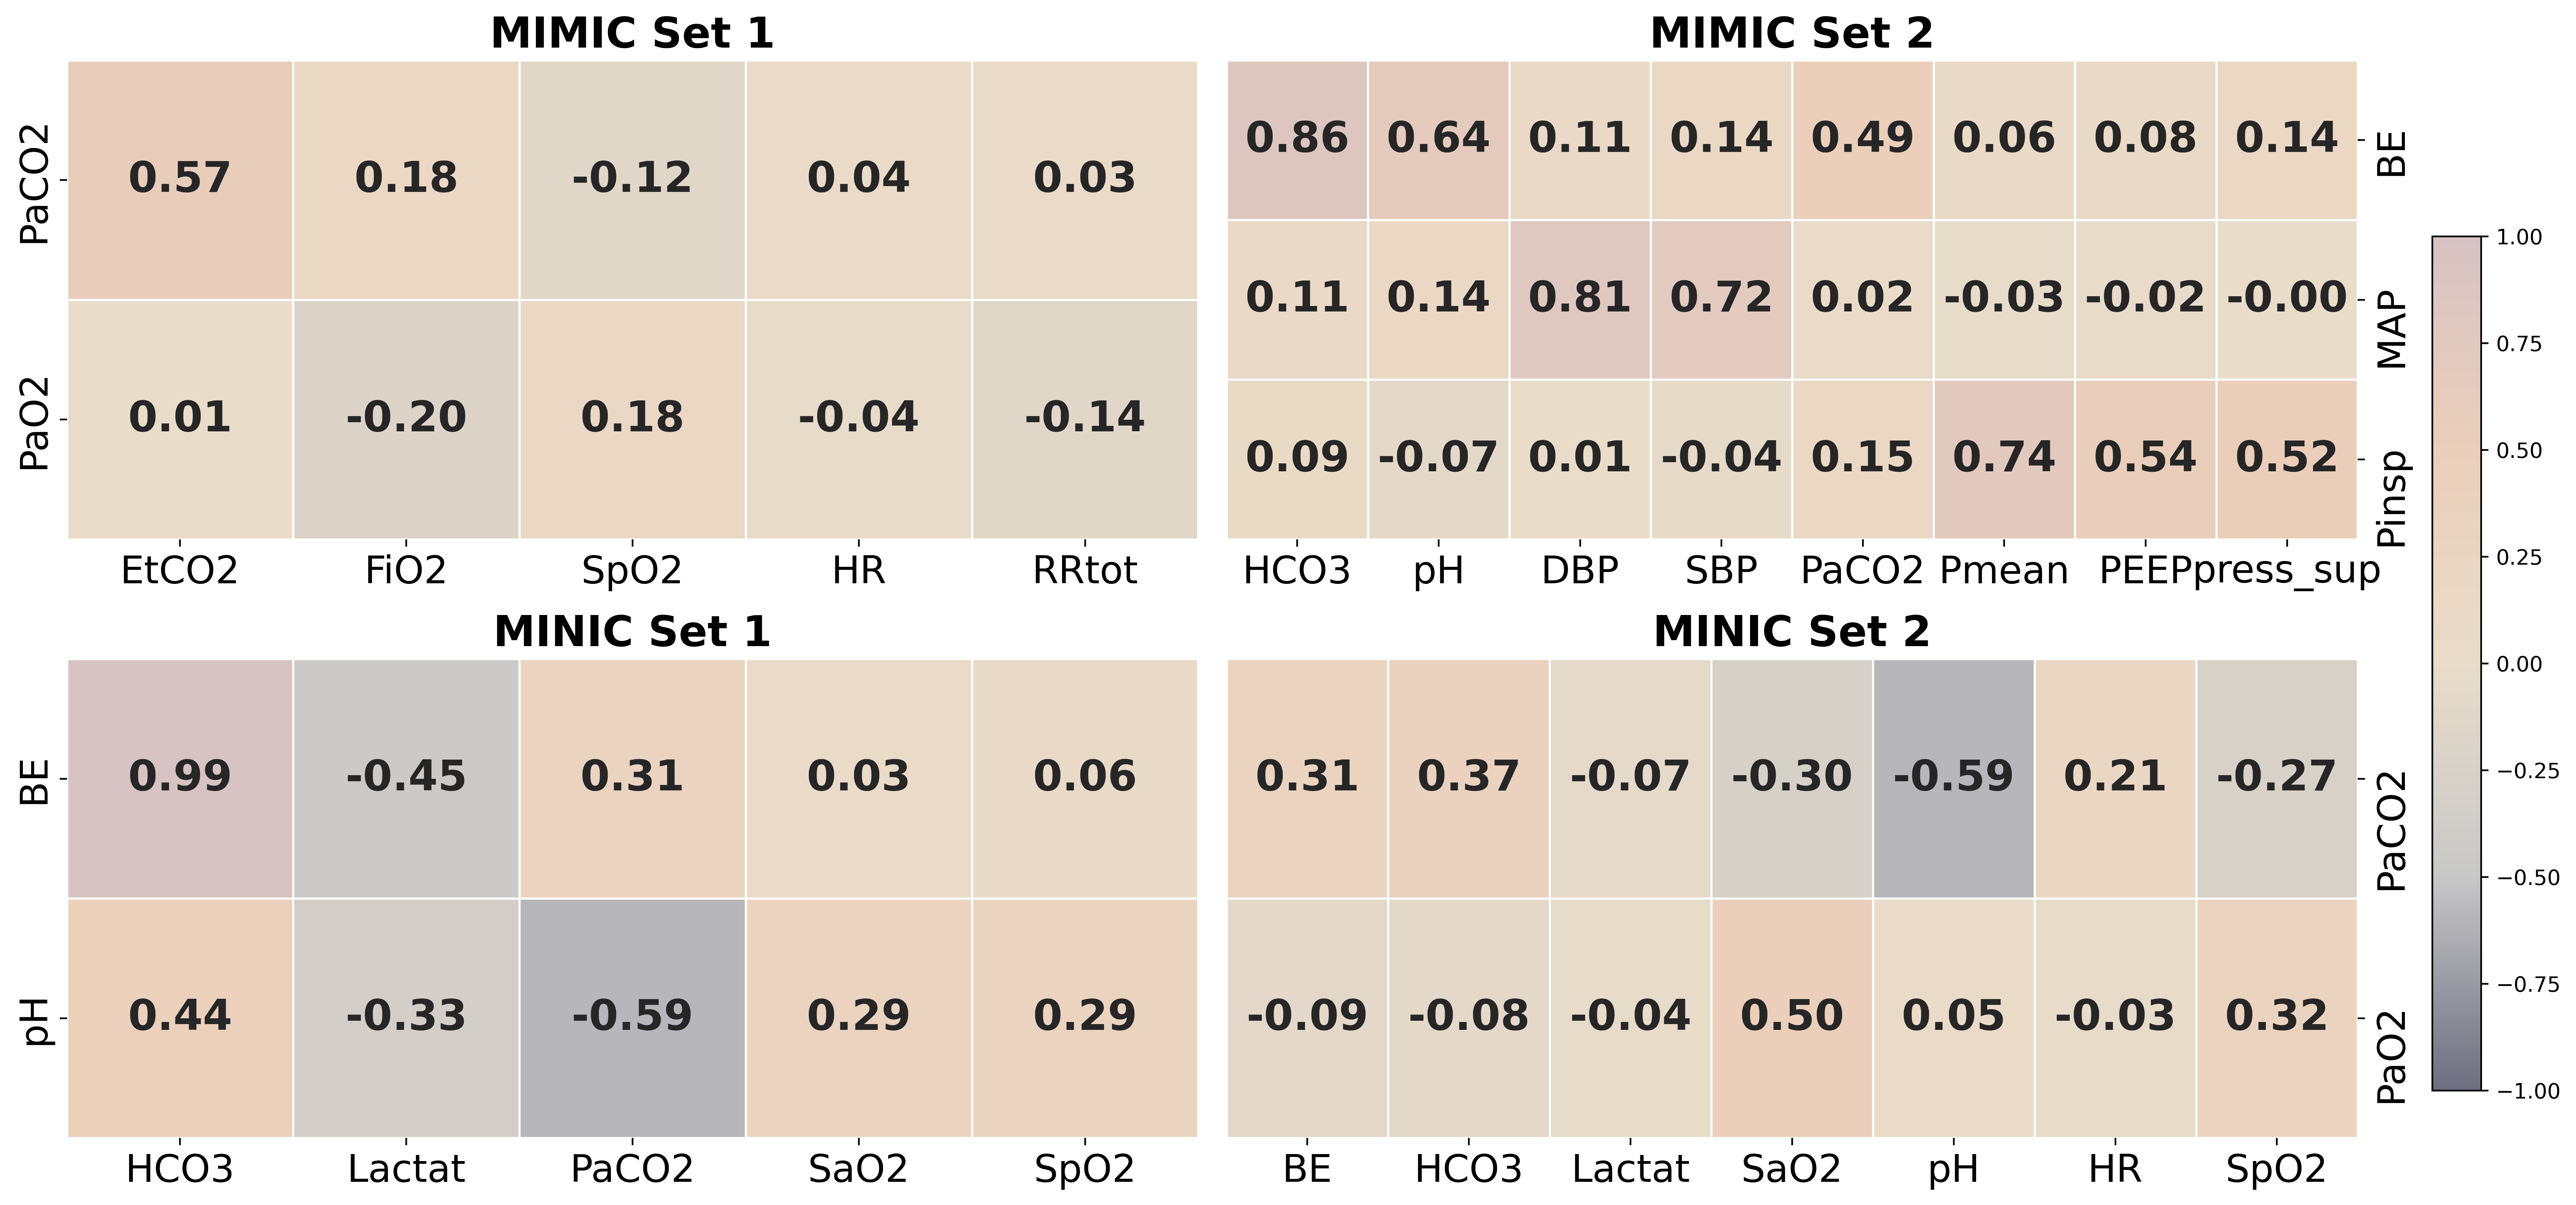

In [19]:
import matplotlib as mpl

# Define a custom colormap using the extracted colors
custom_colors = ['#6D6E80', '#C8C8C8', '#E9DCC9', '#EBCFBA', '#D7C3C3']
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

# Visualizing the 4 correlation matrices in one single image with unified range
fig, axes = plt.subplots(2, 2, figsize=(16, 8), dpi=500, gridspec_kw={'width_ratios': [0.95, 0.95]})

# Define a unified range for all heatmaps
vmin, vmax = -1, 1

# Plot each correlation matrix
sns.heatmap(mimic_corr, ax=axes[0, 0], annot=True, cmap=custom_cmap, vmin=vmin, vmax=vmax, cbar=False, linewidths=1, fmt=".2f", annot_kws={"fontweight": "bold", "fontsize": 20})
axes[0, 0].set_title('MIMIC Set 1', fontsize=20, fontweight="bold")

sns.heatmap(mimic_2_corr, ax=axes[0, 1], annot=True, cmap=custom_cmap, vmin=vmin, vmax=vmax, cbar=False, linewidths=1, fmt=".2f", annot_kws={"fontweight": "bold", "fontsize": 20})
axes[0, 1].set_title('MIMIC Set 2', fontsize=20, fontweight="bold")
axes[0, 1].yaxis.set_label_position("right")
axes[0, 1].yaxis.tick_right()

sns.heatmap(tud_3_corr, ax=axes[1, 0], annot=True, cmap=custom_cmap, vmin=vmin, vmax=vmax, cbar=False, linewidths=1, fmt=".2f", annot_kws={"fontweight": "bold", "fontsize": 20})
axes[1, 0].set_title('MINIC Set 1', fontsize=20, fontweight="bold")

sns.heatmap(tud_4_corr, ax=axes[1, 1], annot=True, cmap=custom_cmap, vmin=vmin, vmax=vmax, cbar=False, linewidths=1, fmt=".2f", annot_kws={"fontweight": "bold", "fontsize": 20})
axes[1, 1].set_title('MINIC Set 2', fontsize=20, fontweight="bold")
axes[1, 1].yaxis.set_label_position("right")
axes[1, 1].yaxis.tick_right()


#cmap='YlGnBu'
# Add the colorbar to the extreme right with adjusted position
cbar_ax = fig.add_axes([1, 0.1, 0.02, 0.7])  # [left, bottom, width, height]
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical')

for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=20, fontweight='bold')  # Adjust font size and weight
    ax.set_ylabel(ax.get_ylabel(), fontsize=20, fontweight='bold')  # Adjust font size and weight
    ax.tick_params(axis='both', labelsize=18)  # Adjust tick font size

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.3)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()